In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Our function

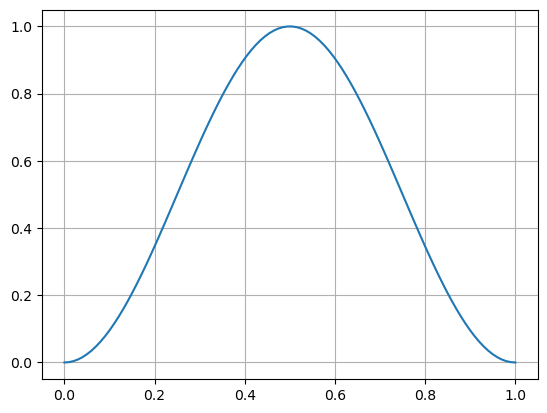

In [211]:
# define nice cosine function to evolve 
def f(x, t=0):
    return -0.5 * np.cos(2 * np.pi * (x-t)) + .5

xs = np.linspace(0, 1, 100)
dx = 1/(len(xs)-1)
ys = f(xs)
# plot 
plt.plot(xs, ys)
plt.grid()

# Define functions for iterating using different methods
Using numerical method and numerical model

In [172]:
def all_steps(ys, dt, nsteps, all_steps=True):
    y_next = np.zeros((len(ys), nsteps+1))
    y_next[:,0] = ys
    dx = 1/(len(ys)-1)
    A = np.diag(np.ones(len(ys)-1)*dt/dx, -1) + np.eye(len(ys))*(1 - dt / dx)
    for i in range(nsteps):
        y_next[:,i+1] = A @ y_next[:,i]
        y_next[0,i+1] = y_next[-1,i+1]
    if all_steps:
        return y_next
    else:
        return y_next[:,-1]
    return y_next

def ml_all_steps(ys, dt, nsteps, a, b, all_steps=True):
    y_next = np.zeros((len(ys), nsteps+1))
    y_next[:,0] = ys
    dx = 1/(len(ys)-1)
    A = np.diag(np.ones(len(ys)-1)*b, -1) + np.eye(len(ys))*a
    for i in range(nsteps):
        y_next[:,i+1] = A @ y_next[:,i]
        y_next[0,i+1] = y_next[-1,i+1]
    if all_steps:
        return y_next
    else:
        return y_next[:,-1]

# Generate training data

In [251]:
dt = 0.01
num_steps_train = 6
xd = np.linspace(0, 1, 21)
dxd = 1/(len(xd)-1)
yd = f(xd)
t = np.arange(0,dt*num_steps_train+dt/2,dt)
X, T = np.meshgrid(xd, t, indexing='ij')
data = f(X, T)

# Get pairs of data at every time point and squash them together into one array
x_train = [[data[i-1:i+1,k] for i in range(1,len(yd))] for k in range(len(data[0])-1)]
x_train = np.concatenate(x_train)

# Get the y data - the next time point for every x point
y_train = np.concatenate([data[1:,i+1] for i in range(len(data[0])-1)])

# Fit ML model (aka linear regression) tot the data

In [252]:
reg = LinearRegression(fit_intercept=False).fit(x_train, y_train)
b = reg.coef_[0]
a = reg.coef_[1]
print('Learned a, b:', a, b)
print('Actual a, b:', (1 - dt / dxd), dt/dxd)

Learned a, b: 0.802098269439523 0.20051527879668674
Actual a, b: 0.8 0.19999999999999998


# Compare model results after dt*nsteps time

In [277]:
num_steps_test = 20
ml_result = ml_all_steps(yd, dt, num_steps_test, a, b, all_steps=False)
num_result = all_steps(yd, dt, num_steps_test, all_steps=False)
data_result = f(xd, dt*num_steps_test)

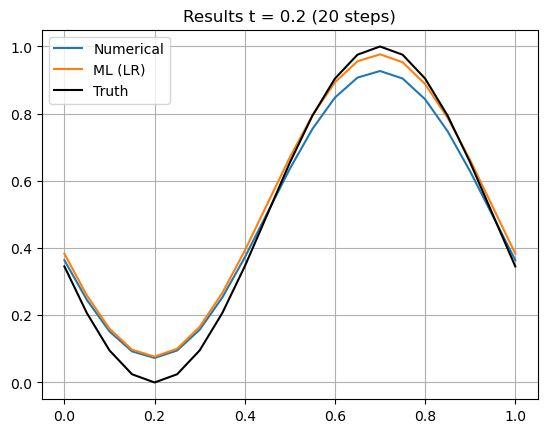

In [278]:
plt.plot(xd, num_result, label='Numerical')
plt.plot(xd, ml_result, label='ML (LR)')
plt.plot(xd, data_result, c='black', label='Truth')
plt.title(f'Results t = {dt*num_steps_test} ({num_steps_test} steps)')
plt.legend()
plt.grid()

# Plot MSE with time

In [269]:
num_steps_test = 500
ml_result = ml_all_steps(yd, dt, num_steps_test, a, b, all_steps=True)
num_result = all_steps(yd, dt, num_steps_test, all_steps=True)
t = np.arange(0,dt*num_steps_test+dt/2,dt)
X, T = np.meshgrid(xd, t, indexing='ij')
data_result = f(X, T)

/var/folders/jx/jm7b72ln0d78w3s302w5ry_00000gn/T/ipykernel_43827/3884855207.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t, np.log10(np.mean((num_result-data_result)**2, axis=0)), label='Numerical')
/var/folders/jx/jm7b72ln0d78w3s302w5ry_00000gn/T/ipykernel_43827/3884855207.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t, np.log10(np.mean((ml_result-data_result)**2, axis=0)), label='ML (LR)')


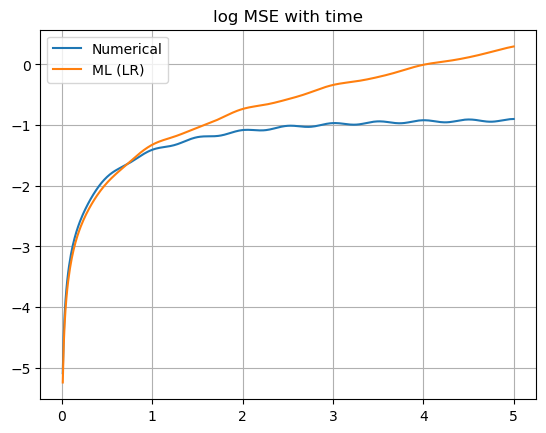

In [274]:
plt.plot(t, np.log10(np.mean((num_result-data_result)**2, axis=0)), label='Numerical')
plt.plot(t, np.log10(np.mean((ml_result-data_result)**2, axis=0)), label='ML (LR)')
plt.title(f'log MSE with time')
plt.legend()
plt.grid()